# IMA-205 
## TP ANN (part A) 26/02/2020
## Coding a Multi-Layer Perceptron in python (for a binary classification problem)

*TP adapted from the IA-306 course, originally written by Geoffroy Peeters

$\newcommand{\underbr}[2]{\underbrace{#1}_{\scriptscriptstyle{#2}}}$

### Objective:
We want to implement a two layers MLP (1 hidden layer) in Python.

#### Forward propagation

- $\large \underbr{Z^{[1]}}{(n^{[1]},m)} = \underbr{W^{[1]}}{(n^{[1]},n^{[0]})} \underbr{X}{(n^{[0]},m)} + \underbr{b^{[1]}}{n^{(1)}} $
- $\large \underbr{A^{[1]}}{(n^{[1]},m)} = f(Z^{[1]})$
- $\large \underbr{Z^{[2]}}{(n^{[2]},m)} = \underbr{W^{[2]}}{(n^{[2]},n^{[1]})} \underbr{A^{[1]}}{(n^{[1]},m)} + \underbr{b^{[2]}}{n^{(2)}}$
- $\large \underbr{A^{[2]}}{(n^{[2]},m)} = \sigma(Z^{[2]})$

where 
- $f$ is a ```Relu``` function (the code is provided)
- $\sigma$ is a sigmoid function (the code is provided)

#### Compute the cost 

The cost is average of the the loss over the training data. Since we are dealing with a binary classification problem, we will use the binary cross-entropy :

$\mathcal{L} = - \hat{y} \log(y) - (1-\hat{y}) \log(1-y) $

where $\hat{y}$ is the label (ground truth) and $y$ is the prediction.

#### Backward propagation

The backward propagation can be calculated as

- $\large \underbr{dZ^{[2]}}{(n^{[2]},m)} = \underbr{A^{[2]}}{(n^{[2]},m)} - \underbr{\hat{Y}}{(n^{[2]},m)}$
- $\large \underbr{dW^{[2]}}{(n^{[2]},n^{[1]})} = \frac{1}{m} \underbr{dZ^{[2]}}{(n^{[2]},m)} {\underbr{A^{[1]}}{(n^{[1]},m)}}^{T}$
- $\large \underbr{db^{[2]}}{(n^{[2]})} = \frac{1}{m} \sum_{i=1}^{m} \underbr{dZ^{[2]}}{(n^{[2]},m)}$

- $\large \underbr{dA^{[1]}}{(n^{[1]},m)} = {\underbr{W^{[2]}}{(n^{[2]},n^{[1]})}}^{T} \underbr{dZ^{[2]}}{(n^{[2]},m)}$
- $\large \underbr{dZ^{[1]}}{(n^{[1]},m)} = \underbr{dA^{[1]}}{(n^{[1]},m)} \: \odot \: f' (\underbr{Z^{[1]}}{(n^{[1]},m)})$
- $\large \underbr{dW^{[1]}}{(n^{[1]},n^{[0]})} = \frac{1}{m} \underbr{dZ^{[1]}}{(n^{[1]},m)} {\underbr{X}{(n^{[0]},m)}}^{T}$
- $\large \underbr{db^{[1]}}{(n^{[1]})} = \frac{1}{m} \sum_{i=1}^{m} \underbr{dZ^{[1]}}{(n^{[1]},m)}$

Write the corresponding backward propagation algorithm.

#### Parameters update

- Implement a simple gradient descent:
- $W = W - \alpha dW$


#### IMPORTANT IMPLEMENTATION INFORMATION !

We recall that the $\odot$ operator refers to the __point-wise multiplication__ operation. You can check the correct sizes of the different matrices by looking at the course slides. Note that we need $f'$, the derivative of the ReLU function, in order to calculate $dZ^{(1)}$. You will need to specify this in the ```F_dRelu``` function below. Finally, note that the __matrix multiplication__ operation, on the other hand, can be carried out in Python using ```np.dot(.,.)``` function.


### Your task:

You need to add the missing parts in the code (parts between ```# --- START CODE HERE``` and ```# --- END CODE HERE```)

### Note 

The code is written using python classes (in order to be able to pass all the variables easely from one function to the other).

To use a given variable, you need to use ```self.$VARIABLE_NAME```, such as````self.W1````,```self.b1```, ... (see the code already written).

### Testing

For testing your code, you can use the code provided in the last cells (loop over epochs and display of the loss decrease).
You should obtain a cost which decreases over epochs.

# 1. Load packages

In [ ]:
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn import model_selection
import matplotlib.pyplot as plt 
import pdb

# 2. Define a set of functions

In [ ]:
def F_standardize(X):
    """
    standardize X, i.e. subtract mean (over data) and divide by standard-deviation (over data)
    
    Parameters
    ----------
    X: np.array of size (nbData, nbDim)
        matrix containing the observation data
    
    Returns
    -------
    X: np.array of size (nbData, nbDim)
        standardize version of X
    """
    
    X -= np.mean(X, axis=0, keepdims=True) 
    X /= (np.std(X, axis=0, keepdims=True) + 1e-16)
    return X

In [ ]:
def F_sigmoid(x):
    """Compute the value of the sigmoid activation function"""
    return 1 / (1 + np.exp(-x))

def F_relu(x):
    """Compute the value of the Rectified Linear Unit activation function"""
    return x * (x > 0)

def F_dRelu(x):
    """Compute the derivative of the Rectified Linear Unit activation function"""
    y = x
    x[x<=0] = 0
    x[x>0] = 1
    return x

def F_computeCost(y,hat_y):
    """Compute the cost (sum of the losses)
    
    Parameters
    ----------
    y: (1, nbData)
        predicted value by the MLP
    hat_y: (1, nbData)
        ground-truth class to predict
    """
    m = y.shape[1]
     
    # --- START CODE HERE
    loss = -hat_y * np.log(y) - (1 - hat_y)* np.log(1- y)
    # --- END CODE HERE
    
    cost = np.sum(loss) / m
    return cost

def F_computeAccuracy(y,hat_y):
    """Compute the accuracy
    
    Parameters
    ----------
    y: (1, nbData)
        predicted value by the MLP
    hat_y: (1, nbData)
        ground-truth class to predict
    """
    
    m = hat_y.shape[1]    
    class_y = np.copy(y)
    class_y[class_y>=0.5]=1
    class_y[class_y<0.5]=0
    return np.sum(class_y==hat_y) / m

# 3. Load dataset and pre-process it

In [ ]:
X, y = datasets.make_circles(n_samples=1000, noise=0.05, factor=0.5)

print("X.shape: {}".format(X.shape))
print("y.shape: {}".format(y.shape))
print(set(y))

# X is (nbExamples, nbDim)
# y is (nbExamples,)

# --- Standardize data
X = F_standardize(X)

# --- Split between training set and test set
X_train, X_test, hat_y_train, hat_y_test = model_selection.train_test_split(X, y, test_size=0.2)

# --- Convert to proper shape: (nbExamples, nbDim) -> (nbDim, nbExamples)
X_train = X_train.T
X_test = X_test.T

# --- Convert to proper shape: (nbExamples,) -> (1, nbExamples)
hat_y_train = hat_y_train.reshape(1, len(hat_y_train))
hat_y_test = hat_y_test.reshape(1, len(hat_y_test))

n_in = X_train.shape[0]
n_out = 1

print("X_train.shape: {}".format(X_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("hat_y_train.shape: {}".format(hat_y_train.shape))
print("hat_y_test.shape: {}".format(hat_y_test.shape))
print("n_in: {} n_out: {}".format(n_in, n_out))

X.shape: (1000, 2)
y.shape: (1000,)
{0, 1}
X_train.shape: (2, 800)
X_test.shape: (2, 200)
hat_y_train.shape: (1, 800)
hat_y_test.shape: (1, 200)
n_in: 2 n_out: 1


Now, let's visualise the data we are working on 

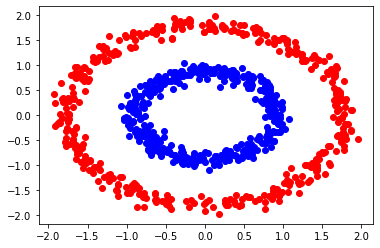

In [ ]:
# plot data
plt.scatter(X_train[0,np.ravel(hat_y_train==0)],X_train[1,np.ravel(hat_y_train==0)],color='r')
plt.scatter(X_train[0,np.ravel(hat_y_train==1)],X_train[1,np.ravel(hat_y_train==1)],color='b')

# 4. Define the MLP class with forward, backward and update methods

In [21]:
class C_MultiLayerPerceptron:
    """
    A class used to represent a Multi-Layer Perceptron with 1 hidden layers

    ...

    Attributes
    ----------
    W1, b1, W2, b2:
        weights and biases to be learnt
    Z1, A1, Z2, A2:
        values of the internal neurons to be used for backpropagation
    dW1, db1, dW2, db2, dZ1, dZ2:
        partial derivatives of the loss w.r.t. parameters
        
    Methods
    -------
    forward_propagation
    
    backward_propagation
    
    update_parameters
    
    """

    W1, b1, W2, b2 = [], [], [], []
    Z1, A1, Z2, A2 = [], [], [], []
    dW1, db1, dW2, db2 = [], [], [], []   
    dZ1, dA1, dZ2 = [], [], []
    
    def __init__(self, n_in, n_h, n_out):
        #initialise weight and biases parameters
        self.W1 = np.random.randn(n_h, n_in) * 0.01
        self.b1 = np.zeros(shape=(n_h, 1))
        self.W2 = np.random.randn(n_out, n_h) * 0.01
        self.b2 = np.zeros(shape=(n_out, 1))
        return

    
    def __setattr__(self, attrName, val):
        if hasattr(self, attrName):
            self.__dict__[attrName] = val
        else:
            raise Exception("self.%s note part of the fields" % attrName)

            

    def M_forwardPropagation(self, X):
        """Forward propagation in the MLP

        Parameters
        ----------
        X: numpy array (nbDim, nbData)
            observation data

        Return
        ------
        y: numpy array (1, nbData)
            predicted value by the MLP
        """
        
        # --- START CODE HERE 
        self.Z1 = np.dot(self.W1,X)+ self.b1
        self.A1 = F_relu(self.Z1)
        self.Z2 = np.dot(self.W2,self.A1) + self.b2
        self.A2 = F_sigmoid(self.Z2)
        # --- END CODE HERE
        
        y = self.A2
        
        return y


    def M_backwardPropagation(self, X, hat_y):
        """Backward propagation in the MLP

        Parameters
        ----------
        X: numpy array (nbDim, nbData)
            observation data
        hat_y: numpy array (1, nbData)
            ground-truth class to predict
            
        """
        
        m = hat_y.shape[1]  #batch size
        
        # --- START CODE HERE
        self.dZ2 = self.A2 - hat_y      
        self.dW2 = (1./m)*np.dot(self.dZ2,self.A1.T)
        self.db2 = (1./m)*np.sum(self.dZ2, axis=1,keepdims=True)
        self.dA1 = np.dot(self.W2.T,self.dZ2)
        self.dZ1 = self.dA1 * F_dRelu(self.Z1)
        self.dW1 = (1./m)*np.dot(self.dZ1,X.T)
        self.db1 = (1./m)*np.sum(self.dZ1, axis=1,keepdims=True)
        # --- END CODE HERE
        return

    
    def M_gradientDescent(self, alpha):
        """Update the parameters of the network using gradient descent

        Parameters
        ----------
        alpha: float scalar
            amount of update at each step of the gradient descent
            
        """

        # --- START CODE HERE
        self.W1 = self.W1 -alpha*(self.dW1)
        self.b1 = self.b1 -alpha*(self.db1)
        self.W2 = self.W2 -alpha*(self.dW2)
        self.b2 = self.b2 -alpha*(self.db2)
        # --- END CODE HERE
        
        return


# 5. Perform training using batch-gradiant and epochs

In [22]:
# Instantiate the class MLP with providing 
# the size of the various layers (input=4, hidden=10, outout=1) 

n_hidden = 10
num_epoch = 5000


myMLP = C_MultiLayerPerceptron(n_in, n_hidden, n_out)

train_cost, train_accuracy, test_cost, test_accuracy = [], [], [], []

# Run over epochs
for i in range(0, num_epoch):
    
    # --- Forward
    y_predict_train = myMLP.M_forwardPropagation(X_train)
    
    # --- Store results on train
    train_cost.append( F_computeCost(y_predict_train, hat_y_train) )
    train_accuracy.append( F_computeAccuracy(y_predict_train, hat_y_train) )
    
    # --- Backward
    myMLP.M_backwardPropagation(X_train, hat_y_train)
    
    # --- Update
    myMLP.M_gradientDescent(alpha=0.1)

    # --- Store results on test
    y_predict_test = myMLP.M_forwardPropagation(X_test)
    test_cost.append( F_computeCost(y_predict_test, hat_y_test) )    
    test_accuracy.append( F_computeAccuracy(y_predict_test, hat_y_test) )
    
    if (i % 100)==0: 
        print("epoch: {0:d} (cost: train {1:.2f} test {2:.2f}) (accuracy: train {3:.2f} test {4:.2f})".format(i, train_cost[-1], test_cost[-1], train_accuracy[-1], test_accuracy[-1]))

epoch: 0 (cost: train 0.69 test 0.69) (accuracy: train 0.49 test 0.45)
epoch: 100 (cost: train 0.69 test 0.69) (accuracy: train 0.50 test 0.49)
epoch: 200 (cost: train 0.69 test 0.69) (accuracy: train 0.50 test 0.49)
epoch: 300 (cost: train 0.69 test 0.69) (accuracy: train 0.52 test 0.51)
epoch: 400 (cost: train 0.68 test 0.67) (accuracy: train 0.66 test 0.69)
epoch: 500 (cost: train 0.64 test 0.64) (accuracy: train 0.78 test 0.81)
epoch: 600 (cost: train 0.56 test 0.56) (accuracy: train 0.94 test 0.93)
epoch: 700 (cost: train 0.45 test 0.44) (accuracy: train 1.00 test 0.99)
epoch: 800 (cost: train 0.34 test 0.34) (accuracy: train 1.00 test 1.00)
epoch: 900 (cost: train 0.26 test 0.26) (accuracy: train 1.00 test 1.00)
epoch: 1000 (cost: train 0.20 test 0.20) (accuracy: train 1.00 test 1.00)
epoch: 1100 (cost: train 0.16 test 0.16) (accuracy: train 1.00 test 1.00)
epoch: 1200 (cost: train 0.13 test 0.12) (accuracy: train 1.00 test 1.00)
epoch: 1300 (cost: train 0.10 test 0.10) (accuracy

## Display train/test loss and accuracy

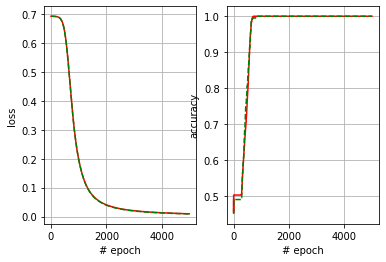

In [23]:
plt.subplot(1,2,1)
plt.plot(train_cost, 'r')
plt.plot(test_cost, 'g--')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(train_accuracy, 'r')
plt.plot(test_accuracy, 'g--')
plt.xlabel('# epoch')
plt.ylabel('accuracy')
plt.grid(True)

In [24]:
train_accuracy

[0.49,
 0.45375,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0.5025,
 0

In [25]:
test_accuracy

[0.45,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,
 0.49,

Tensorflow playground
You can check out the tensorflow Playground here to test out an MLP graphically :

https://playground.tensorflow.org/